# Abstract

__This project applies machine learning to analyze employee retention,focussing on factors like number of projects, promotion within the last 5 years, average monthly hours worked and salary of each employee. Using classification models such as Decision Tree Classifier and Random Forest Classifier, I predict turnover and rank key factors influencing employee retention. Insights help the HR develop a targeted retention strategies to proatively improve workforce stability.__

# Importing libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from lazypredict.Supervised import LazyClassifier,LazyRegressor
%matplotlib inline

# Importing the dataset

In [57]:
df=pd.read_csv('HR_capstone_dataset.csv')

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Exploration

In [59]:
df.shape

(14999, 10)

In [60]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [61]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [62]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [63]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Visualizing the data

Text(0.5, 1.0, 'Satisfaction level vs Leaving the company')

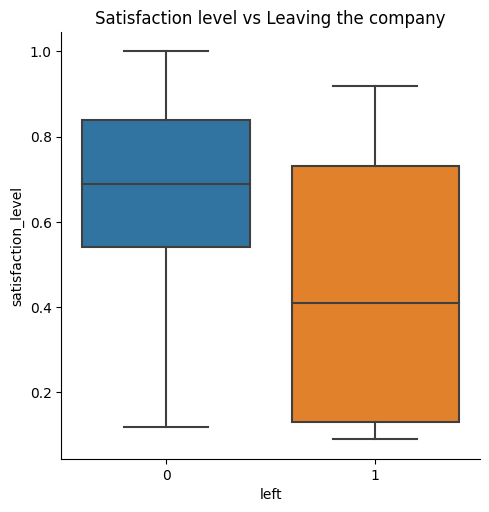

In [64]:
sb.catplot(x='left',y='satisfaction_level',data=df,kind='box')
plt.title('Satisfaction level vs Leaving the company')

# Data Preprocessing

In [78]:
LE=LabelEncoder()

In [79]:
LE

LabelEncoder()

In [80]:
df['department']=LE.fit_transform(df['Department'])
df['Salary']=LE.fit_transform(df['salary'])

In [82]:
df.drop('Department',axis=1,inplace=True)
df.drop('salary',axis=1,inplace=True)

In [83]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,Salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# Model building

In [84]:
x=df.drop('left',axis=1)
y=df['left']

In [85]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)

In [89]:
train_x.shape,train_y.shape

((11249, 9), (11249,))

In [90]:
Scaler=MinMaxScaler()

In [91]:
Scaler

MinMaxScaler()

In [92]:
train_x=Scaler.fit_transform(train_x)

In [93]:
test_x=Scaler.fit_transform(test_x)

In [94]:
Model=DecisionTreeClassifier() # This is the first selected model to solve the problem

In [95]:
Model.fit(train_x,train_y)

DecisionTreeClassifier()

In [96]:
y_pred = Model.predict(test_x)

In [97]:
print(y_pred)

[1 0 0 ... 1 0 0]


In [98]:
Report = classification_report(y_pred,test_y)

In [99]:
print(Report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2860
           1       0.97      0.95      0.96       890

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [101]:
Importances = Model.feature_importances_

In [103]:
Feature_Importances =pd.DataFrame({'Feature':x.columns,'Importance':Importances}).sort_values(by='Importance',ascending=False)

In [105]:
Feature_Importances

,Feature,Importance
0,satisfaction_level,0.50
1,last_evaluation,0.15
4,time_spend_company,0.14
2,number_project,0.10
3,average_montly_hours,0.09
7,department,0.01
8,Salary,0.01
5,Work_accident,0.00
6,promotion_last_5years,0.00


In [107]:
model=RandomForestClassifier() # This is the Second selected model

In [108]:
model.fit(train_x,train_y)

RandomForestClassifier()

In [109]:
Y_pred=model.predict(test_x)

In [110]:
print(Y_pred)

[1 0 0 ... 1 0 0]


In [111]:
Report = classification_report(Y_pred,test_y)

In [112]:
print(Report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2896
           1       0.97      0.99      0.98       854

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



In [113]:
Importances = Model.feature_importances_

In [114]:
Feature_Importances =pd.DataFrame({'Feature':x.columns,'Importance':Importances}).sort_values(by='Importance',ascending=False)

In [115]:
Feature_Importances

,Feature,Importance
0,satisfaction_level,0.50
1,last_evaluation,0.15
4,time_spend_company,0.14
2,number_project,0.10
3,average_montly_hours,0.09
7,department,0.01
8,Salary,0.01
5,Work_accident,0.00
6,promotion_last_5years,0.00
